In [3]:
# Importamos las librerías

import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
%pwd

'/home/cygnus/Documentos/SasildeLeon/tiktok'

In [5]:
# Leemos los archvios .csv de los comentarios

comentarios_df = pd.read_csv("tiktok_coments.csv", usecols=["tiktok-xm2h10-PCommentText", "tiktok-1665s4c-SpanUserNameText"])
comentarios_df = comentarios_df.rename(columns= {"tiktok-1665s4c-SpanUserNameText": "usuario", "tiktok-xm2h10-PCommentText": "texto"})
comentarios_df['texto_limpio'] = comentarios_df['texto'].str.lower().str.replace('[^a-zA-Z\s]', '', regex=True)
comentarios_df = comentarios_df.dropna()
palabras_df = comentarios_df.copy()
comentarios_df

,usuario,texto,texto_limpio
0,Eduardo Grajales,Ers una política qué te falta humildad haces a...,ers una poltica qu te falta humildad haces apa...
1,TanguyMoo,Se aprovechan de la gente ahora que están en c...,se aprovechan de la gente ahora que estn en ca...
2,user6986649228326,"SI ASÍ COMO HACEN TIK TOKS, TRABAJARAN",si as como hacen tik toks trabajaran
3,hectorlanda7777,Y por eso les pagan una lanota servidores públ...,y por eso les pagan una lanota servidores pbli...
4,JESUS DIAZ,como político das mucho que desear,como poltico das mucho que desear
...,...,...,...
225,yuli,se mira deliciosos\nsaludos mi senadora desde ...,se mira deliciosos\nsaludos mi senadora desde ...
226,Sayuri Gómez,saludos desde Tapachula Chiapas!!,saludos desde tapachula chiapas
227,user1828629274761,Saludos desde Mezcalapa Chiapas!!!,saludos desde mezcalapa chiapas
228,user1828629274761,🥰,


In [7]:
# Descargar el conjunto de stopwords en español si no lo tienes
nltk.download('stopwords')

# Crear tu propio conjunto de stopwords personalizado
#mis_stop_words = {'miapalabra1', 'miapalabra2', 'miapalabra3'}

# Agregar tus palabras personalizadas al conjunto de stopwords en español
#stop_words_espanol.update(mis_stop_words)

[nltk_data] Downloading package stopwords to /home/cygnus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import emoji 
# Crear una lista de todos los emoticones
all_emojis = list(emoji.EMOJI_DATA.keys())

# Función para extraer emoticones de un texto utilizando la lista de todos los emoticones
def extract_all_emojis(text):
    return ' '.join(emoji for emoji in all_emojis if emoji in text)

# Aplicar la función de extracción de emoticones a la columna "comentarios"
comentarios_df['Emoticons'] = comentarios_df['texto'].apply(extract_all_emojis)

comentarios_df

,usuario,texto,texto_limpio,Emoticons
0,Eduardo Grajales,Ers una política qué te falta humildad haces a...,ers una poltica qu te falta humildad haces apa...,
1,TanguyMoo,Se aprovechan de la gente ahora que están en c...,se aprovechan de la gente ahora que estn en ca...,🏾 👎 👎🏾
2,user6986649228326,"SI ASÍ COMO HACEN TIK TOKS, TRABAJARAN",si as como hacen tik toks trabajaran,
3,hectorlanda7777,Y por eso les pagan una lanota servidores públ...,y por eso les pagan una lanota servidores pbli...,
4,JESUS DIAZ,como político das mucho que desear,como poltico das mucho que desear,
...,...,...,...,...
225,yuli,se mira deliciosos\nsaludos mi senadora desde ...,se mira deliciosos\nsaludos mi senadora desde ...,
226,Sayuri Gómez,saludos desde Tapachula Chiapas!!,saludos desde tapachula chiapas,
227,user1828629274761,Saludos desde Mezcalapa Chiapas!!!,saludos desde mezcalapa chiapas,
228,user1828629274761,🥰,,🥰


In [7]:
from nltk.tokenize import word_tokenize
###Diccionarios en español para el análisis de polaridad
nltk.download('punkt')
# Tokenización
comentarios_df['tokens'] = comentarios_df['texto_limpio'].apply(word_tokenize)
# Análisis de polaridad
# Obtención de listado de stopwords del inglés
stop_words = list(stopwords.words('spanish'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("q", "d", "van", "si", "pa", "así", "ser", "solo", "tan", "va",
                   "le", "con","ella", "qué", "por", "qu", "ers", "das", "ve", "jajaja", "jeje"))


# Filtrado para excluir stopwords
# ==============================================================================
tweets_tidy = comentarios_df[~(comentarios_df["tokens"].isin(stop_words))]
tweets_tidy.to_csv("tiktok_sentiment_coments.csv")
tweets_tidy


[nltk_data] Downloading package punkt to /home/cygnus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,usuario,texto,texto_limpio,tokens
0,Eduardo Grajales,Ers una política qué te falta humildad haces a...,ers una poltica qu te falta humildad haces apa...,"[ers, una, poltica, qu, te, falta, humildad, h..."
1,TanguyMoo,Se aprovechan de la gente ahora que están en c...,se aprovechan de la gente ahora que estn en ca...,"[se, aprovechan, de, la, gente, ahora, que, es..."
2,user6986649228326,"SI ASÍ COMO HACEN TIK TOKS, TRABAJARAN",si as como hacen tik toks trabajaran,"[si, as, como, hacen, tik, toks, trabajaran]"
3,hectorlanda7777,Y por eso les pagan una lanota servidores públ...,y por eso les pagan una lanota servidores pbli...,"[y, por, eso, les, pagan, una, lanota, servido..."
4,JESUS DIAZ,como político das mucho que desear,como poltico das mucho que desear,"[como, poltico, das, mucho, que, desear]"
...,...,...,...,...
225,yuli,se mira deliciosos\nsaludos mi senadora desde ...,se mira deliciosos\nsaludos mi senadora desde ...,"[se, mira, deliciosos, saludos, mi, senadora, ..."
226,Sayuri Gómez,saludos desde Tapachula Chiapas!!,saludos desde tapachula chiapas,"[saludos, desde, tapachula, chiapas]"
227,user1828629274761,Saludos desde Mezcalapa Chiapas!!!,saludos desde mezcalapa chiapas,"[saludos, desde, mezcalapa, chiapas]"
228,user1828629274761,🥰,,[]


In [8]:
##########NUBE DE PALABRAS
def preprocess_text(text):
    words = text # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalpha()]  # Eliminar caracteres no alfabéticos
    words = [word for word in words if word not in stop_words]  # Eliminar palabras vacías
    return words


preprocessed_text = tweets_tidy["tokens"].apply(preprocess_text)

# Unimos todas las listas de palabras en una sola lista
all_words = [word for sublist in preprocessed_text.values for word in sublist]

# Creamos un DataFrame con las palabras y sus frecuencias
word_counts = pd.Series(all_words).value_counts()

# Tomamos las palabras más comunes (puedes ajustar este valor según tus necesidades)
top_words = word_counts.head(20)
top_words.to_csv("tiktok_words_coments.csv")
type(top_words)

pandas.core.series.Series

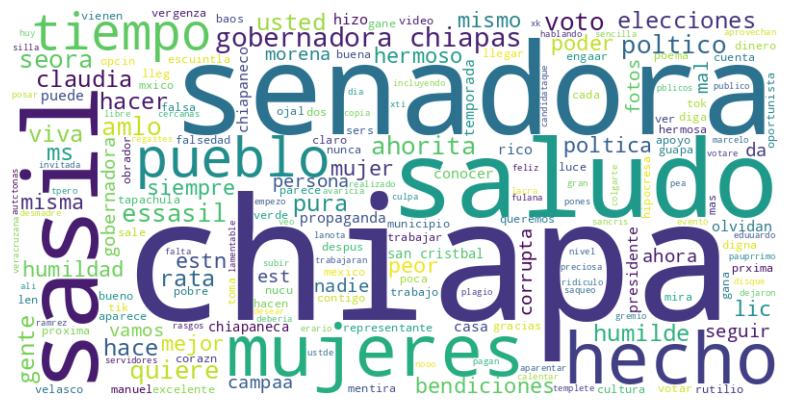

In [71]:
# Unir las palabras en un solo texto (separadas por espacios)
texto = " ".join(all_words)

# Crear el objeto WordCloud
nube_palabras = WordCloud(width=800, height=400, background_color='white').generate(texto)


# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')  # Desactivar ejes
plt.show()


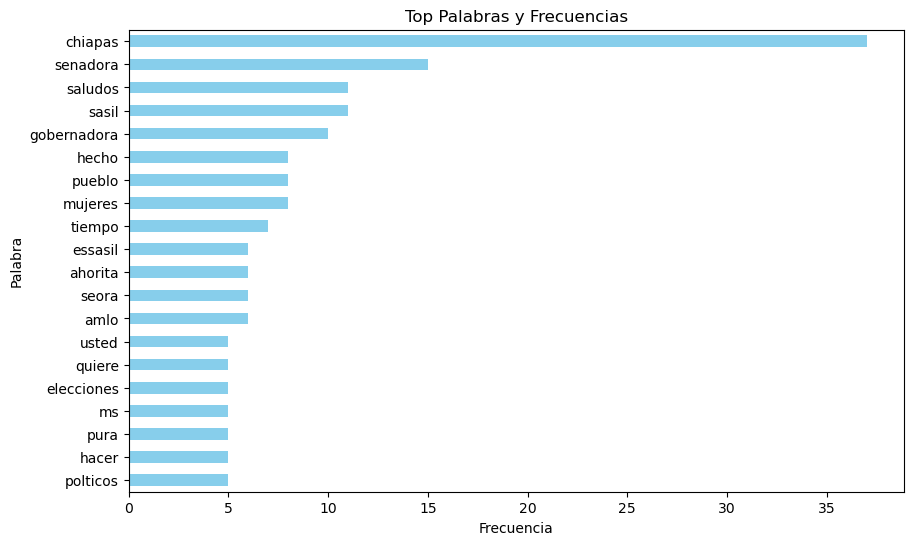

In [72]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
top_words.plot(kind='barh', color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Top Palabras y Frecuencias')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la palabra con la frecuencia más alta en la parte superior
plt.show()


In [48]:
flatten_corpus = [w for l in preprocessed_text for w in l]
flatten_corpus = pd.DataFrame(flatten_corpus)

In [50]:
# Función para obtener n-gramas de una lista de palabras
def obtener_ngramas(lista_palabras, n):
    threshold=3
    n_gramas = list(ngrams(lista_palabras, n))
    return [' '.join(grama) for grama in n_gramas if len(grama[0])>threshold and len(grama[1])>threshold]

# Obtener n-gramas de tamaño 2 (bigramas) para todas las filas
n = 2
tweets_tidy['bigramas'] = tweets_tidy.tokens.apply(lambda row: obtener_ngramas(row, n))

# Obtener n-gramas de tamaño 3 (trigramas) para todas las filas
n = 3
tweets_tidy['trigramas'] = tweets_tidy.tokens.apply(lambda row: obtener_ngramas(row, n))

# Mostrar el DataFrame con los n-gramas
tweets_tidy

,usuario,texto,texto_limpio,Emoticons,tokens,sentimiento,bigramas,trigramas
0,Eduardo Grajales,Ers una política qué te falta humildad haces a...,ers una poltica qu te falta humildad haces apa...,,"[ers, una, poltica, qu, te, falta, humildad, h...",0.0,"[falta humildad, humildad haces, haces aparentar]","[falta humildad haces, humildad haces aparenta..."
1,TanguyMoo,Se aprovechan de la gente ahora que están en c...,se aprovechan de la gente ahora que estn en ca...,🏾 👎 👎🏾,"[se, aprovechan, de, la, gente, ahora, que, es...",0.0,"[gente ahora, campaa corrupta, corrupta como, ...","[gente ahora que, campaa corrupta como, corrup..."
2,user6986649228326,"SI ASÍ COMO HACEN TIK TOKS, TRABAJARAN",si as como hacen tik toks trabajaran,,"[si, as, como, hacen, tik, toks, trabajaran]",0.0,"[como hacen, toks trabajaran]",[como hacen tik]
3,hectorlanda7777,Y por eso les pagan una lanota servidores públ...,y por eso les pagan una lanota servidores pbli...,,"[y, por, eso, les, pagan, una, lanota, servido...",0.0,"[lanota servidores, servidores pblicos, pauprr...","[lanota servidores pblicos, servidores pblicos..."
4,JESUS DIAZ,como político das mucho que desear,como poltico das mucho que desear,,"[como, poltico, das, mucho, que, desear]",0.0,[como poltico],[como poltico das]
...,...,...,...,...,...,...,...,...
225,yuli,se mira deliciosos\nsaludos mi senadora desde ...,se mira deliciosos\nsaludos mi senadora desde ...,,"[se, mira, deliciosos, saludos, mi, senadora, ...",0.0,"[mira deliciosos, deliciosos saludos, senadora...","[mira deliciosos saludos, deliciosos saludos m..."
226,Sayuri Gómez,saludos desde Tapachula Chiapas!!,saludos desde tapachula chiapas,,"[saludos, desde, tapachula, chiapas]",0.0,"[saludos desde, desde tapachula, tapachula chi...","[saludos desde tapachula, desde tapachula chia..."
227,user1828629274761,Saludos desde Mezcalapa Chiapas!!!,saludos desde mezcalapa chiapas,,"[saludos, desde, mezcalapa, chiapas]",0.0,"[saludos desde, desde mezcalapa, mezcalapa chi...","[saludos desde mezcalapa, desde mezcalapa chia..."
228,user1828629274761,🥰,,🥰,[],0.0,[],[]


In [51]:
from collections import Counter

# Función para contar la frecuencia de n-gramas en una lista de n-gramas
def contar_frecuencia_ngramas(lista_ngramas):
    ngrama_counter = Counter(lista_ngramas)
    return ngrama_counter

# Obtener la frecuencia de bigramas y trigramas para cada fila
tweets_tidy['frecuencia_bigramas'] = tweets_tidy['bigramas'].apply(lambda lista: contar_frecuencia_ngramas(lista))
tweets_tidy['frecuencia_trigramas'] = tweets_tidy['trigramas'].apply(lambda lista: contar_frecuencia_ngramas(lista))

# Mostrar el DataFrame con la frecuencia de n-gramas
tweets_tidy

,usuario,texto,texto_limpio,Emoticons,tokens,sentimiento,bigramas,trigramas,frecuencia_bigramas,frecuencia_trigramas
0,Eduardo Grajales,Ers una política qué te falta humildad haces a...,ers una poltica qu te falta humildad haces apa...,,"[ers, una, poltica, qu, te, falta, humildad, h...",0.0,"[falta humildad, humildad haces, haces aparentar]","[falta humildad haces, humildad haces aparenta...","{'falta humildad': 1, 'humildad haces': 1, 'ha...","{'falta humildad haces': 1, 'humildad haces ap..."
1,TanguyMoo,Se aprovechan de la gente ahora que están en c...,se aprovechan de la gente ahora que estn en ca...,🏾 👎 👎🏾,"[se, aprovechan, de, la, gente, ahora, que, es...",0.0,"[gente ahora, campaa corrupta, corrupta como, ...","[gente ahora que, campaa corrupta como, corrup...","{'gente ahora': 1, 'campaa corrupta': 1, 'corr...","{'gente ahora que': 1, 'campaa corrupta como':..."
2,user6986649228326,"SI ASÍ COMO HACEN TIK TOKS, TRABAJARAN",si as como hacen tik toks trabajaran,,"[si, as, como, hacen, tik, toks, trabajaran]",0.0,"[como hacen, toks trabajaran]",[como hacen tik],"{'como hacen': 1, 'toks trabajaran': 1}",{'como hacen tik': 1}
3,hectorlanda7777,Y por eso les pagan una lanota servidores públ...,y por eso les pagan una lanota servidores pbli...,,"[y, por, eso, les, pagan, una, lanota, servido...",0.0,"[lanota servidores, servidores pblicos, pauprr...","[lanota servidores pblicos, servidores pblicos...","{'lanota servidores': 1, 'servidores pblicos':...","{'lanota servidores pblicos': 1, 'servidores p..."
4,JESUS DIAZ,como político das mucho que desear,como poltico das mucho que desear,,"[como, poltico, das, mucho, que, desear]",0.0,[como poltico],[como poltico das],{'como poltico': 1},{'como poltico das': 1}
...,...,...,...,...,...,...,...,...,...,...
225,yuli,se mira deliciosos\nsaludos mi senadora desde ...,se mira deliciosos\nsaludos mi senadora desde ...,,"[se, mira, deliciosos, saludos, mi, senadora, ...",0.0,"[mira deliciosos, deliciosos saludos, senadora...","[mira deliciosos saludos, deliciosos saludos m...","{'mira deliciosos': 1, 'deliciosos saludos': 1...","{'mira deliciosos saludos': 1, 'deliciosos sal..."
226,Sayuri Gómez,saludos desde Tapachula Chiapas!!,saludos desde tapachula chiapas,,"[saludos, desde, tapachula, chiapas]",0.0,"[saludos desde, desde tapachula, tapachula chi...","[saludos desde tapachula, desde tapachula chia...","{'saludos desde': 1, 'desde tapachula': 1, 'ta...","{'saludos desde tapachula': 1, 'desde tapachul..."
227,user1828629274761,Saludos desde Mezcalapa Chiapas!!!,saludos desde mezcalapa chiapas,,"[saludos, desde, mezcalapa, chiapas]",0.0,"[saludos desde, desde mezcalapa, mezcalapa chi...","[saludos desde mezcalapa, desde mezcalapa chia...","{'saludos desde': 1, 'desde mezcalapa': 1, 'me...","{'saludos desde mezcalapa': 1, 'desde mezcalap..."
228,user1828629274761,🥰,,🥰,[],0.0,[],[],{},{}


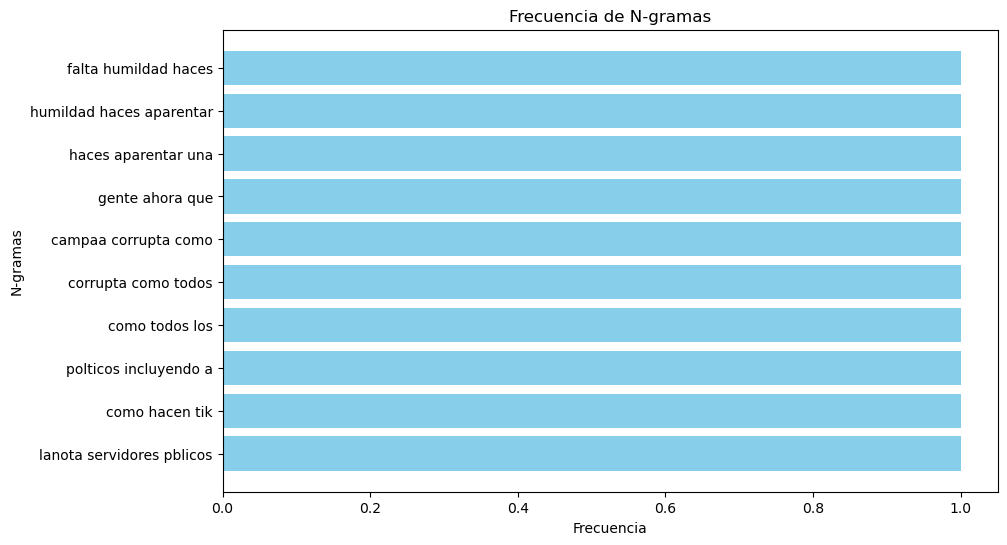

In [55]:
# Consolidar las frecuencias de n-gramas en un solo diccionario
frecuencias_consolidadas = {}
for index, row in tweets_tidy.iterrows():
    #frecuencias_consolidadas.update(row['frecuencia_bigramas'])
    frecuencias_consolidadas.update(row['frecuencia_trigramas'])

# Ordenar el diccionario por frecuencia (de mayor a menor)
frecuencias_ordenadas = dict(sorted(frecuencias_consolidadas.items(), key=lambda item: item[1], reverse=True))

# Tomar los primeros N n-gramas para graficar
N = 10  # Puedes ajustar N según tus necesidades
ngramas = list(frecuencias_ordenadas.keys())[:N]
frecuencias = list(frecuencias_ordenadas.values())[:N]

# Graficar los n-gramas y sus frecuencias
plt.figure(figsize=(10, 6))
plt.barh(ngramas, frecuencias, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('N-gramas')
plt.title('Frecuencia de N-gramas')
plt.gca().invert_yaxis()  # Invertir el eje y para que los n-gramas más frecuentes estén arriba
plt.show()

In [74]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

def clasificar_emociones(texto):
    # Cargar el modelo preentrenado de BERT para la clasificación de emociones
    model_name = "bert-base-uncased"
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertForSequenceClassification.from_pretrained(model_name)

    # Codificar la oración de entrada
    input_ids = tokenizer.encode(texto, add_special_tokens=True, max_length=128, truncation=True, padding='max_length', return_tensors='pt')

    # Obtener las probabilidades de cada clase de emoción
    outputs = model(input_ids)
    probs = torch.softmax(outputs.logits, dim=1)[0]

    # Lista de etiquetas de emociones (pueden variar según el modelo o conjunto de datos)
    emociones = ["Felicidad", "Tristeza", "Enojo", "Miedo", "Sorpresa", "Disgusto"]

    # Crear un diccionario con las probabilidades de cada emoción
    resultados = {emocion: prob.item() * 100 for emocion, prob in zip(emociones, probs)}

    return resultados

/home/cygnus/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [76]:
tweets_tidy

,usuario,texto,texto_limpio,Emoticons,tokens
0,Eduardo Grajales,Ers una política qué te falta humildad haces a...,ers una poltica qu te falta humildad haces apa...,,"[ers, una, poltica, qu, te, falta, humildad, h..."
1,TanguyMoo,Se aprovechan de la gente ahora que están en c...,se aprovechan de la gente ahora que estn en ca...,🏾 👎 👎🏾,"[se, aprovechan, de, la, gente, ahora, que, es..."
2,user6986649228326,"SI ASÍ COMO HACEN TIK TOKS, TRABAJARAN",si as como hacen tik toks trabajaran,,"[si, as, como, hacen, tik, toks, trabajaran]"
3,hectorlanda7777,Y por eso les pagan una lanota servidores públ...,y por eso les pagan una lanota servidores pbli...,,"[y, por, eso, les, pagan, una, lanota, servido..."
4,JESUS DIAZ,como político das mucho que desear,como poltico das mucho que desear,,"[como, poltico, das, mucho, que, desear]"
...,...,...,...,...,...
225,yuli,se mira deliciosos\nsaludos mi senadora desde ...,se mira deliciosos\nsaludos mi senadora desde ...,,"[se, mira, deliciosos, saludos, mi, senadora, ..."
226,Sayuri Gómez,saludos desde Tapachula Chiapas!!,saludos desde tapachula chiapas,,"[saludos, desde, tapachula, chiapas]"
227,user1828629274761,Saludos desde Mezcalapa Chiapas!!!,saludos desde mezcalapa chiapas,,"[saludos, desde, mezcalapa, chiapas]"
228,user1828629274761,🥰,,🥰,[]


In [77]:
tweets_tidy['emociones'] = tweets_tidy['texto_limpio'].apply(clasificar_emociones)
tweets_tidy

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are

,usuario,texto,texto_limpio,Emoticons,tokens,emociones
0,Eduardo Grajales,Ers una política qué te falta humildad haces a...,ers una poltica qu te falta humildad haces apa...,,"[ers, una, poltica, qu, te, falta, humildad, h...","{'Felicidad': 43.77165138721466, 'Tristeza': 5..."
1,TanguyMoo,Se aprovechan de la gente ahora que están en c...,se aprovechan de la gente ahora que estn en ca...,🏾 👎 👎🏾,"[se, aprovechan, de, la, gente, ahora, que, es...","{'Felicidad': 46.92200720310211, 'Tristeza': 5..."
2,user6986649228326,"SI ASÍ COMO HACEN TIK TOKS, TRABAJARAN",si as como hacen tik toks trabajaran,,"[si, as, como, hacen, tik, toks, trabajaran]","{'Felicidad': 30.071094632148743, 'Tristeza': ..."
3,hectorlanda7777,Y por eso les pagan una lanota servidores públ...,y por eso les pagan una lanota servidores pbli...,,"[y, por, eso, les, pagan, una, lanota, servido...","{'Felicidad': 55.555135011672974, 'Tristeza': ..."
4,JESUS DIAZ,como político das mucho que desear,como poltico das mucho que desear,,"[como, poltico, das, mucho, que, desear]","{'Felicidad': 46.480730175971985, 'Tristeza': ..."
...,...,...,...,...,...,...
225,yuli,se mira deliciosos\nsaludos mi senadora desde ...,se mira deliciosos\nsaludos mi senadora desde ...,,"[se, mira, deliciosos, saludos, mi, senadora, ...","{'Felicidad': 41.15810990333557, 'Tristeza': 5..."
226,Sayuri Gómez,saludos desde Tapachula Chiapas!!,saludos desde tapachula chiapas,,"[saludos, desde, tapachula, chiapas]","{'Felicidad': 49.76659715175629, 'Tristeza': 5..."
227,user1828629274761,Saludos desde Mezcalapa Chiapas!!!,saludos desde mezcalapa chiapas,,"[saludos, desde, mezcalapa, chiapas]","{'Felicidad': 63.17746639251709, 'Tristeza': 3..."
228,user1828629274761,🥰,,🥰,[],"{'Felicidad': 54.20856475830078, 'Tristeza': 4..."


In [87]:
print(tweets_tidy.emociones[4])

{'Felicidad': 46.480730175971985, 'Tristeza': 53.519266843795776}


In [88]:
# Convertir las columnas de emociones en columnas separadas
df_emociones = pd.DataFrame(tweets_tidy['emociones'].tolist())

df_emociones




,Felicidad,Tristeza
0,43.771651,56.228352
1,46.922007,53.077996
2,30.071095,69.928902
3,55.555135,44.444868
4,46.480730,53.519267
...,...,...
212,41.158110,58.841890
213,49.766597,50.233400
214,63.177466,36.822537
215,54.208565,45.791441


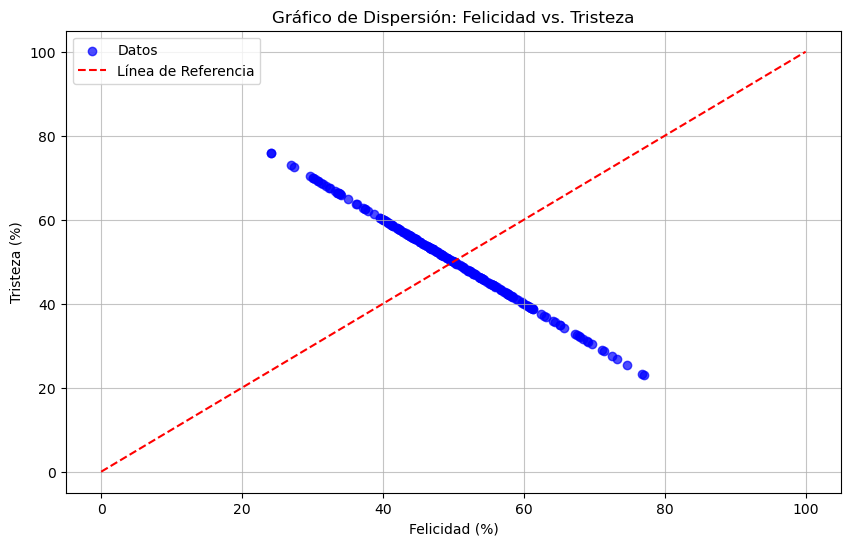

In [137]:
import matplotlib.pyplot as plt


# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_emociones['Felicidad'], df_emociones['Tristeza'], c='blue', label='Datos', alpha=0.7)

plt.xlabel('Felicidad (%)')
plt.ylabel('Tristeza (%)')
plt.title('Gráfico de Dispersión: Felicidad vs. Tristeza')

# Agregar una línea de referencia diagonal
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Línea de Referencia')

plt.legend()
plt.grid(alpha=0.75)

plt.show()

In [90]:
preprocessed_text

0      [poltica, falta, humildad, haces, aparentar, p...
1      [aprovechan, gente, ahora, estn, campaa, corru...
2                     [as, hacen, tik, toks, trabajaran]
3      [pagan, lanota, servidores, pblicos, pauprrimo...
4                                      [poltico, desear]
                             ...                        
225    [mira, deliciosos, saludos, senadora, tuxtla, ...
226                        [saludos, tapachula, chiapas]
227                        [saludos, mezcalapa, chiapas]
228                                                   []
229                 [senadora, gusto, verla, plataforma]
Name: tokens, Length: 217, dtype: object

In [103]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Supongamos que tienes un corpus de textos en una lista llamada 'corpus_textos'

tweets_tidy.texto_limpio

0      ers una poltica qu te falta humildad haces apa...
1      se aprovechan de la gente ahora que estn en ca...
2                   si as como hacen tik toks trabajaran
3      y por eso les pagan una lanota servidores pbli...
4                      como poltico das mucho que desear
                             ...                        
225    se mira deliciosos\nsaludos mi senadora desde ...
226                      saludos desde tapachula chiapas
227                      saludos desde mezcalapa chiapas
228                                                     
229         senadora que gusto verla en esta plataforma 
Name: texto_limpio, Length: 217, dtype: object

In [110]:
texts = tweets_tidy.tokens

punctuation = set(string.punctuation)

texts = [[word for word in doc if word not in stop_words and word not in punctuation] for doc in texts]

# Crear un diccionario de términos a partir del corpus
dictionary = corpora.Dictionary(texts)

# Crear una representación vectorial del corpus
corpus = [dictionary.doc2bow(text) for text in texts]

In [111]:
# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Obtener los temas y sus palabras clave
topics = lda_model.print_topics(num_words=5)

# Mostrar los temas y sus palabras clave
for topic in topics:
    print(topic)

(0, '0.018*"senadora" + 0.015*"usted" + 0.015*"chiapas" + 0.011*"pueblo" + 0.011*"hacer"')
(1, '0.018*"chiapas" + 0.016*"senadora" + 0.016*"saludos" + 0.015*"ms" + 0.011*"sasil"')
(2, '0.016*"pura" + 0.016*"chiapas" + 0.008*"da" + 0.008*"seora" + 0.008*"elecciones"')
(3, '0.025*"sasil" + 0.018*"amlo" + 0.018*"viva" + 0.015*"chiapas" + 0.011*"hermoso"')
(4, '0.058*"chiapas" + 0.029*"gobernadora" + 0.019*"saludos" + 0.015*"mujeres" + 0.015*"tiempo"')


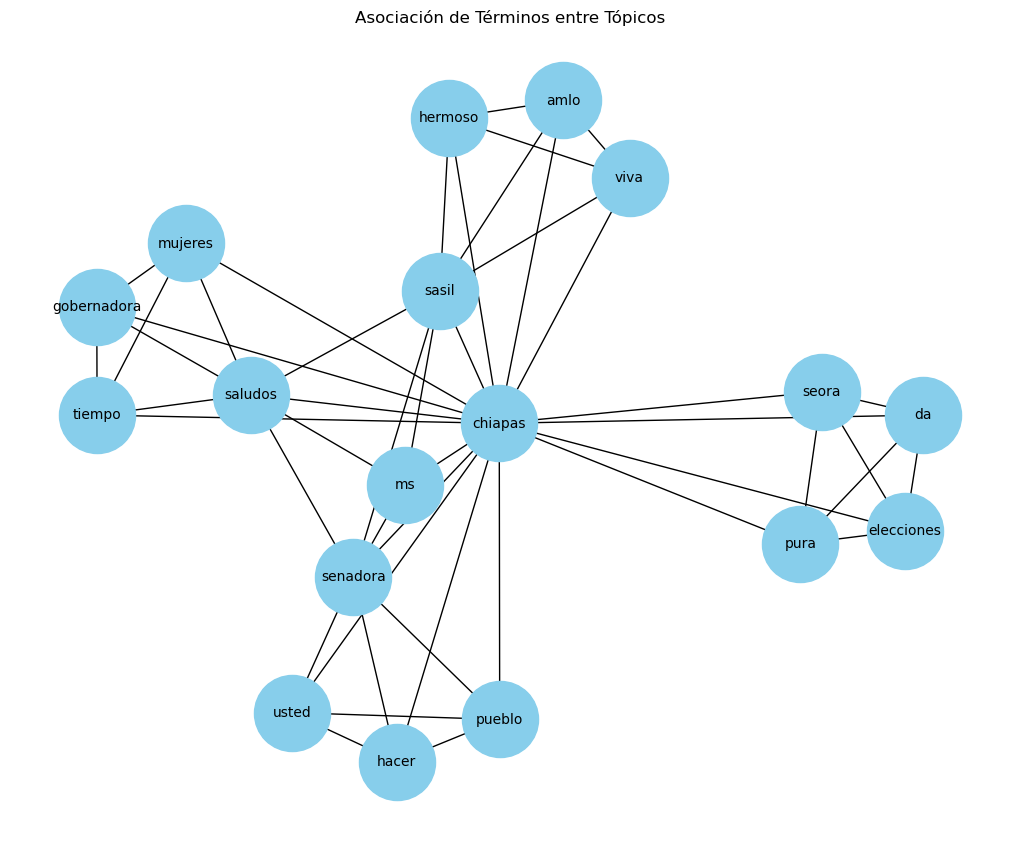

In [116]:
import networkx as nx
import matplotlib.pyplot as plt


# Crear un grafo de red
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Dibujar el gráfico de red
pos = nx.spring_layout(G, k=0.3, iterations=50)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=3000, node_color='skyblue', font_color='black')

# Mostrar el gráfico de red
plt.title('Asociación de Términos entre Tópicos')
plt.show()



In [126]:
import networkx as nx
import plotly.graph_objs as go

# Supongamos que 'topics' contiene las asociaciones entre términos en los tópicos (como se mencionó en el ejemplo anterior)

# Crear un grafo de red
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Crear un layout para el gráfico de red
pos = nx.spring_layout(G, k=0.3, iterations=50)

# Crear nodos y aristas para Plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Tópico',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

# Crear un gráfico de red interactivo
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()


In [120]:
import plotly.express as px
from wordcloud import WordCloud

# Supongamos que 'word_freq' contiene las frecuencias de palabras (como se mencionó en el ejemplo anterior)

# Crear una nube de palabras
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Crear una figura de Plotly
fig = px.imshow(nube_palabras, width=800, height=400)
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)
fig.show()
